In [35]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [36]:
# Ana veri setini okuyun
data = pd.read_excel('Kumeyenı_2_veri_seti.xlsx')

In [37]:
# Eksik bilgileri içeren dosyayı okuyun
ek_bilgiler = pd.read_excel('TR.xlsx')  # Eksik bilgiler dosya adını ve yolunu güncelleyin

# Ana veri setine eksik bilgileri ekleyin
data = pd.concat([data, ek_bilgiler[['Enlem', 'Boylam', 'Aylar']]], axis=1)

In [38]:
data

,Mw,R,Kume,Enlem,Boylam,Aylar
0,3.6,90.5,1.0,36.2608,31.6478,10
1,2.8,104.0,1.0,38.0863,36.6297,10
2,3.6,56.2,1.0,38.0105,36.4315,10
3,3.9,68.1,1.0,38.0163,37.4432,10
4,3.3,71.6,1.0,38.0758,36.5587,10
...,...,...,...,...,...,...
12768,NaN,NaN,NaN,38.7000,41.5000,5
12769,NaN,NaN,NaN,39.1000,42.5000,4
12770,NaN,NaN,NaN,39.0000,28.0000,4
12771,NaN,NaN,NaN,39.8000,30.5000,5


In [39]:
cluster_2 = data.dropna()

In [40]:
cluster_2 = cluster_2.drop(columns=["Kume"])

In [41]:
cluster_2

,Mw,R,Enlem,Boylam,Aylar
0,3.6,90.5,36.2608,31.6478,10
1,2.8,104.0,38.0863,36.6297,10
2,3.6,56.2,38.0105,36.4315,10
3,3.9,68.1,38.0163,37.4432,10
4,3.3,71.6,38.0758,36.5587,10
...,...,...,...,...,...
704,5.4,100.0,37.8597,36.2850,5
705,6.0,70.0,39.1772,40.3902,5
706,6.0,180.0,38.0780,37.6100,5
707,6.2,60.0,38.3337,37.3793,5


### Linear Regressor

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
import numpy as np
import pandas as pd

In [43]:
# Cluster_2 veri setini oku
cluster_2
# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_2['Mw']
y_r = cluster_2['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Çoklu lineer regresyon modellerini oluştur ve eğit
model_mw = LinearRegression()
model_mw.fit(X_train, y_mw_train)

model_r = LinearRegression()
model_r.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred = model_mw.predict(X_test)
r_pred = model_r.predict(X_test)

# R-Kare (R²) değerlerini hesapla
r2_mw = r2_score(y_mw_test, mw_pred)
r2_r = r2_score(y_r_test, r_pred)

# Hata ölçümlerini yazdır
mse_mw = mean_squared_error(y_mw_test, mw_pred)
mse_r = mean_squared_error(y_r_test, r_pred)

print(f"MW Model MSE: {mse_mw}")
print(f"R Model MSE: {mse_r}")

print(f"MW Model R²: {r2_mw}")
print(f"R Model R²: {r2_r}")

MW Model MSE: 0.2584154365644786
R Model MSE: 671.2879925792944
MW Model R²: 0.6832895084898101
R Model R²: -0.018846614824172603


### Polinom Regresyonu

In [44]:
# Cluster_2 veri setini oku
cluster_2

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_2['Mw']
y_r = cluster_2['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Polinom regresyon modellerini oluştur ve eğit
degree = 2  # Polinom derecesini belirle

# MW için polinom regresyon modeli
model_mw = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_mw.fit(X_train, y_mw_train)

# R için polinom regresyon modeli
model_r = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_r.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred = model_mw.predict(X_test)
r_pred = model_r.predict(X_test)

# R-Kare (R²) değerlerini hesapla
r2_mw = r2_score(y_mw_test, mw_pred)
r2_r = r2_score(y_r_test, r_pred)

# Hata ölçümlerini ve R-Kare değerlerini yazdır
mse_mw = mean_squared_error(y_mw_test, mw_pred)
mse_r = mean_squared_error(y_r_test, r_pred)

print(f"MW Model MSE: {mse_mw}")
print(f"R Model MSE: {mse_r}")

print(f"MW Model R²: {r2_mw}")
print(f"R Model R²: {r2_r}")

MW Model MSE: 0.25535018183481434
R Model MSE: 665.1380601818566
MW Model R²: 0.687046243555417
R Model R²: -0.009512561669949626


### Destek Vektör Regresyon (SVR):

In [45]:
cluster_2

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_2['Mw']
y_r = cluster_2['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR modellerini oluştur ve eğit
model_mw = SVR()
model_mw.fit(X_train_scaled, y_mw_train)

model_r = SVR()
model_r.fit(X_train_scaled, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred = model_mw.predict(X_test_scaled)
r_pred = model_r.predict(X_test_scaled)

# R-Kare (R²) değerlerini hesapla
r2_mw = r2_score(y_mw_test, mw_pred)
r2_r = r2_score(y_r_test, r_pred)

# Hata ölçümlerini ve R-Kare değerlerini yazdır
mse_mw = mean_squared_error(y_mw_test, mw_pred)
mse_r = mean_squared_error(y_r_test, r_pred)

print(f"MW Model MSE: {mse_mw}")
print(f"R Model MSE: {mse_r}")

print(f"MW Model R²: {r2_mw}")
print(f"R Model R²: {r2_r}")

MW Model MSE: 0.2459028488961724
R Model MSE: 698.726360433578
MW Model R²: 0.6986247680361367
R Model R²: -0.060491167555145386


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
cluster_2

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_2['Mw']
y_r = cluster_2['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Karar ağacı modellerini oluştur ve eğit
model_mw = DecisionTreeRegressor(random_state=42)
model_mw.fit(X_train, y_mw_train)

model_r = DecisionTreeRegressor(random_state=42)
model_r.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred = model_mw.predict(X_test)
r_pred = model_r.predict(X_test)

# R-Kare (R²) değerlerini hesapla
r2_mw = r2_score(y_mw_test, mw_pred)
r2_r = r2_score(y_r_test, r_pred)

# Hata ölçümlerini yazdır
mse_mw = mean_squared_error(y_mw_test, mw_pred)
mse_r = mean_squared_error(y_r_test, r_pred)

print(f"MW Model MSE: {mse_mw}")
print(f"R Model MSE: {mse_r}")
print(f"MW Model R²: {r2_mw}")
print(f"R Model R²: {r2_r}")

MW Model MSE: 0.46830985915492956
R Model MSE: 1388.1695070422536
MW Model R²: 0.4260457206277698
R Model R²: -1.1068927475044563


### Random forest

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cluster_2 veri setini oku
cluster_2 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_2['Mw']
y_r = cluster_2['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Random Forest modelini oluştur ve eğit
model_mw_rf = RandomForestRegressor()
model_r_rf = RandomForestRegressor()

model_mw_rf.fit(X_train, y_mw_train)
model_r_rf.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_rf = model_mw_rf.predict(X_test)
r_pred_rf = model_r_rf.predict(X_test)

# Hata ölçümlerini yazdır
mse_mw_rf = mean_squared_error(y_mw_test, mw_pred_rf)
mse_r_rf = mean_squared_error(y_r_test, r_pred_rf)

print("Random Forest Results:")
print(f"MW Model MSE: {mse_mw_rf}")
print(f"R Model MSE: {mse_r_rf}")

# R-Kare (R²) değerlerini hesapla
r2_mw_rf = r2_score(y_mw_test, mw_pred_rf)
r2_r_rf = r2_score(y_r_test, r_pred_rf)

print(f"MW Model R²: {r2_mw_rf}")
print(f"R Model R²: {r2_r_rf}")

Random Forest Results:
MW Model MSE: 0.30497346478873255
R Model MSE: 801.9574088309855
MW Model R²: 0.6262286138362914
R Model R²: -0.217169978091184


###  Gradient Boosting Regresyon

In [49]:
from sklearn.ensemble import GradientBoostingRegressor


# Cluster_2 veri setini oku 
cluster_2 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_2['Mw']
y_r = cluster_2['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Gradient Boosting Regresyon modelini oluştur ve eğit
model_mw_gb = GradientBoostingRegressor()
model_r_gb = GradientBoostingRegressor()

model_mw_gb.fit(X_train, y_mw_train)
model_r_gb.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_gb = model_mw_gb.predict(X_test)
r_pred_gb = model_r_gb.predict(X_test)

# Hata ölçümlerini yazdır
mse_mw_gb = mean_squared_error(y_mw_test, mw_pred_gb)
mse_r_gb = mean_squared_error(y_r_test, r_pred_gb)

print("Gradient Boosting Results:")
print(f"MW Model MSE: {mse_mw_gb}")
print(f"R Model MSE: {mse_r_gb}")

# R-Kare (R²) değerlerini hesapla
r2_mw_gb = r2_score(y_mw_test, mw_pred_gb)
r2_r_gb = r2_score(y_r_test, r_pred_gb)

print(f"MW Model R²: {r2_mw_gb}")
print(f"R Model R²: {r2_r_gb}")

Gradient Boosting Results:
MW Model MSE: 0.3023361010322745
R Model MSE: 814.1210390267712
MW Model R²: 0.6294609314667847
R Model R²: -0.2356313144862121


### Ridge regressor

In [50]:
from sklearn.linear_model import Ridge


# Cluster_2 veri setini oku 
cluster_2

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_2['Mw']
y_r = cluster_2['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Ridge Regresyon modelini oluştur ve eğit
alpha_value = 1.0  # alpha parametresi, düzenlileştirme miktarını kontrol eder
model_mw_ridge = Ridge(alpha=alpha_value)
model_r_ridge = Ridge(alpha=alpha_value)

model_mw_ridge.fit(X_train, y_mw_train)
model_r_ridge.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_ridge = model_mw_ridge.predict(X_test)
r_pred_ridge = model_r_ridge.predict(X_test)

# Hata ölçümlerini yazdır
mse_mw_ridge = mean_squared_error(y_mw_test, mw_pred_ridge)
mse_r_ridge = mean_squared_error(y_r_test, r_pred_ridge)

print("Ridge Regression Results:")
print(f"MW Model MSE: {mse_mw_ridge}")
print(f"R Model MSE: {mse_r_ridge}")

# R-Kare (R²) değerlerini hesapla
r2_mw_ridge = r2_score(y_mw_test, mw_pred_ridge)
r2_r_ridge = r2_score(y_r_test, r_pred_ridge)

print(f"MW Model R²: {r2_mw_ridge}")
print(f"R Model R²: {r2_r_ridge}")

Ridge Regression Results:
MW Model MSE: 0.2584563830960741
R Model MSE: 671.2534344814062
MW Model R²: 0.683239324970127
R Model R²: -0.01879416430898795


### Lasso regressor

In [51]:
from sklearn.linear_model import Lasso


# Cluster_2 veri setini oku 
cluster_2 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_2['Mw']
y_r = cluster_2['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Lasso Regresyon modelini oluştur ve eğit
alpha_value = 1.0  # alpha parametresi, düzenlileştirme miktarını kontrol eder
model_mw_lasso = Lasso(alpha=alpha_value)
model_r_lasso = Lasso(alpha=alpha_value)

model_mw_lasso.fit(X_train, y_mw_train)
model_r_lasso.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_lasso = model_mw_lasso.predict(X_test)
r_pred_lasso = model_r_lasso.predict(X_test)

# Hata ölçümlerini yazdır
mse_mw_lasso = mean_squared_error(y_mw_test, mw_pred_lasso)
mse_r_lasso = mean_squared_error(y_r_test, r_pred_lasso)

print("Lasso Regression Results:")
print(f"MW Model MSE: {mse_mw_lasso}")
print(f"R Model MSE: {mse_r_lasso}")

# R-Kare (R²) değerlerini hesapla
r2_mw_lasso = r2_score(y_mw_test, mw_pred_lasso)
r2_r_lasso = r2_score(y_r_test, r_pred_lasso)

print(f"MW Model R²: {r2_mw_lasso}")
print(f"R Model R²: {r2_r_lasso}")

Lasso Regression Results:
MW Model MSE: 0.7308789383281002
R Model MSE: 663.448038142711
MW Model R²: 0.10424458047195118
R Model R²: -0.0069475325727570425


### Elastic Net Regresyon:

In [52]:

from sklearn.linear_model import ElasticNet

# Cluster_2 veri setini oku 
cluster_2 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_2['Mw']
y_r = cluster_2['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Elastic Net Regresyon modelini oluştur ve eğit
alpha_value = 1.0  # alpha parametresi, düzenlileştirme miktarını kontrol eder
l1_ratio_value = 0.5  # l1_ratio parametresi, L1 düzenlileştirmenin oranını belirler
model_mw_en = ElasticNet(alpha=alpha_value, l1_ratio=l1_ratio_value)
model_r_en = ElasticNet(alpha=alpha_value, l1_ratio=l1_ratio_value)

model_mw_en.fit(X_train, y_mw_train)
model_r_en.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_en = model_mw_en.predict(X_test)
r_pred_en = model_r_en.predict(X_test)

# Hata ölçümlerini yazdır
mse_mw_en = mean_squared_error(y_mw_test, mw_pred_en)
mse_r_en = mean_squared_error(y_r_test, r_pred_en)

print("Elastic Net Regression Results:")
print(f"MW Model MSE: {mse_mw_en}")
print(f"R Model MSE: {mse_r_en}")

# R-Kare (R²) değerlerini hesapla
r2_mw_en = r2_score(y_mw_test, mw_pred_en)
r2_r_en = r2_score(y_r_test, r_pred_en)

print(f"MW Model R²: {r2_mw_en}")
print(f"R Model R²: {r2_r_en}")


Elastic Net Regression Results:
MW Model MSE: 0.4452804098572675
R Model MSE: 662.1150172447498
MW Model R²: 0.45427030466670226
R Model R²: -0.0049243415662274526


### Bayesian Regressor

In [53]:
from sklearn.linear_model import BayesianRidge

# Cluster_2 veri setini oku
cluster_2 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_2['Mw']
y_r = cluster_2['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Bayesian Ridge Regresyon modelini oluştur ve eğit
model_mw_bayesian = BayesianRidge()
model_r_bayesian = BayesianRidge()

model_mw_bayesian.fit(X_train, y_mw_train)
model_r_bayesian.fit(X_train, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_bayesian = model_mw_bayesian.predict(X_test)
r_pred_bayesian = model_r_bayesian.predict(X_test)

# Hata ölçümlerini yazdır
mse_mw_bayesian = mean_squared_error(y_mw_test, mw_pred_bayesian)
mse_r_bayesian = mean_squared_error(y_r_test, r_pred_bayesian)

print("Bayesian Ridge Regression Results:")
print(f"MW Model MSE: {mse_mw_bayesian}")
print(f"R Model MSE: {mse_r_bayesian}")

# R-Kare (R²) değerlerini hesapla
r2_mw_bayesian = r2_score(y_mw_test, mw_pred_bayesian)
r2_r_bayesian = r2_score(y_r_test, r_pred_bayesian)

print(f"MW Model R²: {r2_mw_bayesian}")
print(f"R Model R²: {r2_r_bayesian}")

Bayesian Ridge Regression Results:
MW Model MSE: 0.2585755473156809
R Model MSE: 664.4028337681938
MW Model R²: 0.68309327890158
R Model R²: -0.00839667258661958


### Deep Learning

 Dense (Fully Connected) Neural Networks:

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

In [55]:
# Cluster_1 veri setini oku
cluster_2 

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y_mw = cluster_2['Mw']
y_r = cluster_2['R']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_mw_train, y_mw_test, y_r_train, y_r_test = train_test_split(X, y_mw, y_r, test_size=0.2, random_state=42)

# Verileri standartlaştır (önemli bir adım)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dense Neural Networks modelini oluştur ve eğit
def create_and_train_model(X_train_scaled, y_train, epochs=50, batch_size=32):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)
    
    return model

# MW Modeli için
model_mw_dense = create_and_train_model(X_train_scaled, y_mw_train)

# R Modeli için
model_r_dense = create_and_train_model(X_train_scaled, y_r_train)

# Test verisi üzerinde tahmin yap
mw_pred_dense = model_mw_dense.predict(X_test_scaled).flatten()
r_pred_dense = model_r_dense.predict(X_test_scaled).flatten()

# Hata ölçümlerini yazdır
mse_mw_dense = mean_squared_error(y_mw_test, mw_pred_dense)
mse_r_dense = mean_squared_error(y_r_test, r_pred_dense)

# RMSE değerlerini hesapla
rmse_mw_dense = np.sqrt(mse_mw_dense)
rmse_r_dense = np.sqrt(mse_r_dense)

print("Dense Neural Networks Results:")
print(f"MW Model MSE: {mse_mw_dense}")
print(f"MW Model RMSE: {rmse_mw_dense}")
print(f"R Model MSE: {mse_r_dense}")
print(f"R Model RMSE: {rmse_r_dense}")

# R-Kare (R²) değerlerini hesapla
r2_mw_dense = r2_score(y_mw_test, mw_pred_dense)
r2_r_dense = r2_score(y_r_test, r_pred_dense)

print(f"MW Model R²: {r2_mw_dense}")
print(f"R Model R²: {r2_r_dense}")

# Tahmin sonuçlarını göster
result_df = pd.DataFrame({'Actual_MW': y_mw_test, 'Predicted_MW': mw_pred_dense, 'Actual_R': y_r_test, 'Predicted_R': r_pred_dense})
print(result_df)

Epoch 1/50
15/15 [==============================] - 0s 9ms/step - loss: 19.4264 - val_loss: 15.4268
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 14.9981 - val_loss: 11.3713
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 10.7386 - val_loss: 7.7842
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 6.9574 - val_loss: 5.3575
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 4.3456 - val_loss: 3.5859
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 2.7015 - val_loss: 2.3810
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 1.9071 - val_loss: 1.8420
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 1.5896 - val_loss: 1.6526
Epoch 9/50
15/15 [==============================] - 0s 3ms/step - loss: 1.4307 - val_loss: 1.4981
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 1.2921 - val_loss: 1.3756
Epoch 11/50
15

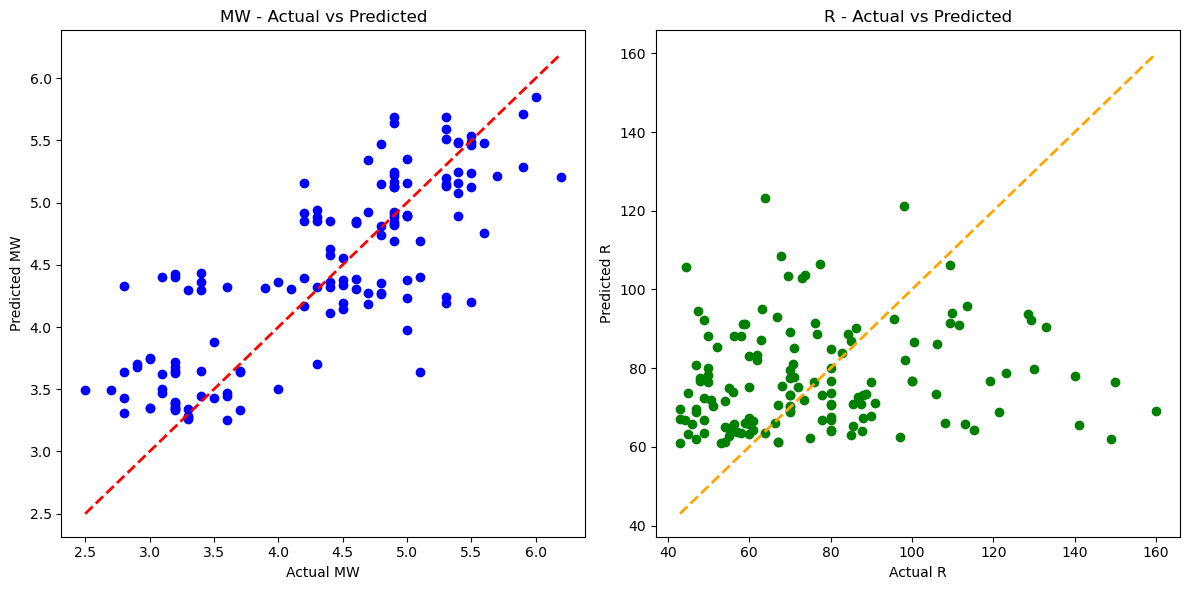

In [57]:
import matplotlib.pyplot as plt

# MW için Tahmin Sonuçları
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_mw_test, mw_pred_dense, color='blue')
plt.plot([min(y_mw_test), max(y_mw_test)], [min(y_mw_test), max(y_mw_test)], linestyle='--', color='red', linewidth=2)
plt.title('MW - Actual vs Predicted')
plt.xlabel('Actual MW')
plt.ylabel('Predicted MW')

# R için Tahmin Sonuçları
plt.subplot(1, 2, 2)
plt.scatter(y_r_test, r_pred_dense, color='green')
plt.plot([min(y_r_test), max(y_r_test)], [min(y_r_test), max(y_r_test)], linestyle='--', color='orange', linewidth=2)
plt.title('R - Actual vs Predicted')
plt.xlabel('Actual R')
plt.ylabel('Predicted R')

plt.tight_layout()
plt.show()

### Convolutional Neural Networks (CNN)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN, Dense

In [59]:
# Cluster_1 veri setini oku
cluster_2

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y = cluster_2[['Mw', 'R']]

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri standartlaştır (önemli bir adım)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RNN modelini oluştur ve eğit
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dense(2))  # Çıktı boyutu 2 (Mw ve R tahminleri)

model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Tahmin yap
predictions_rnn = model_rnn.predict(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)))

# Hata ölçümlerini yazdır
mse_rnn = mean_squared_error(y_test, predictions_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test, predictions_rnn)

print("RNN Results:")
print(f"Model MSE: {mse_rnn}")
print(f"Model RMSE: {rmse_rnn}")
print(f"Model R²: {r2_rnn}")


Epoch 1/50
15/15 [==============================] - 1s 14ms/step - loss: 3277.4978 - val_loss: 3524.6802
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 3171.2947 - val_loss: 3339.7190
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 2857.1169 - val_loss: 2738.5894
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 1967.3961 - val_loss: 1455.1204
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 974.0509 - val_loss: 1030.9177
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 790.6996 - val_loss: 832.4538
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 644.4393 - val_loss: 725.7435
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 560.5289 - val_loss: 666.2271
Epoch 9/50
15/15 [==============================] - 0s 4ms/step - loss: 519.8975 - val_loss: 635.3220
Epoch 10/50
15/15 [==============================] - 0s 4ms/step - loss:

In [60]:
# Hata ölçümlerini yazdır
mse_rnn_mw = mean_squared_error(y_test['Mw'], predictions_rnn[:, 0])
rmse_rnn_mw = np.sqrt(mse_rnn_mw)
r2_rnn_mw = r2_score(y_test['Mw'], predictions_rnn[:, 0])

mse_rnn_r = mean_squared_error(y_test['R'], predictions_rnn[:, 1])
rmse_rnn_r = np.sqrt(mse_rnn_r)
r2_rnn_r = r2_score(y_test['R'], predictions_rnn[:, 1])

print("RNN Results:")
print(f"MW Model MSE: {mse_rnn_mw}")
print(f"MW Model RMSE: {rmse_rnn_mw}")
print(f"MW Model R²: {r2_rnn_mw}")

print(f"R Model MSE: {mse_rnn_r}")
print(f"R Model RMSE: {rmse_rnn_r}")
print(f"R Model R²: {r2_rnn_r}")


RNN Results:
MW Model MSE: 0.8182190225158599
MW Model RMSE: 0.90455459896894
MW Model R²: -0.002798254737101047
R Model MSE: 692.9635717461044
R Model RMSE: 26.32420125561466
R Model R²: -0.05174470134230624


In [61]:
# Tahmin sonuçlarını göster
result_df_rnn = pd.DataFrame({'Actual_MW': y_test['Mw'], 'Predicted_MW': predictions_rnn[:, 0], 'Actual_R': y_test['R'], 'Predicted_R': predictions_rnn[:, 1]})
print(result_df_rnn)

     Actual_MW  Predicted_MW  Actual_R  Predicted_R
294        4.4      4.469323      80.0    75.827278
256        4.8      4.420602     149.0    74.417290
613        4.8      5.198690      60.0    82.120888
357        4.3      4.511730      61.0    75.103577
248        4.2      4.465489      57.0    75.582481
..         ...           ...       ...          ...
609        5.5      4.570676      80.0    74.756081
41         3.2      4.349052      59.0    77.356750
108        2.9      4.375566      85.6    75.473732
259        5.0      4.843056      45.0    78.954666
56         2.8      4.244965      85.0    74.521652

[142 rows x 4 columns]


### Long Short-Term Memory (LSTM):

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [63]:
cluster_2

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y = cluster_2[['Mw', 'R']]

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri standartlaştır (önemli bir adım)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LSTM modelini oluştur ve eğit
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dense(2))  # Çıktı boyutu 2 (Mw ve R tahminleri)

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Test verisi üzerinde tahmin yap
predictions_lstm = model_lstm.predict(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)))

# Hata ölçümlerini yazdır
mse_lstm_mw = mean_squared_error(y_test['Mw'], predictions_lstm[:, 0])
rmse_lstm_mw = np.sqrt(mse_lstm_mw)
r2_lstm_mw = r2_score(y_test['Mw'], predictions_lstm[:, 0])

mse_lstm_r = mean_squared_error(y_test['R'], predictions_lstm[:, 1])
rmse_lstm_r = np.sqrt(mse_lstm_r)
r2_lstm_r = r2_score(y_test['R'], predictions_lstm[:, 1])

print("LSTM Results:")
print(f"MW Model MSE: {mse_lstm_mw}")
print(f"MW Model RMSE: {rmse_lstm_mw}")
print(f"MW Model R²: {r2_lstm_mw}")

print(f"R Model MSE: {mse_lstm_r}")
print(f"R Model RMSE: {rmse_lstm_r}")
print(f"R Model R²: {r2_lstm_r}")

Epoch 1/50
15/15 [==============================] - 1s 15ms/step - loss: 3297.5488 - val_loss: 3582.8816
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 3278.3892 - val_loss: 3556.6323
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 3242.1135 - val_loss: 3497.7439
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 3146.2483 - val_loss: 3321.7253
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 2823.1709 - val_loss: 2750.0593
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 2006.3910 - val_loss: 1825.6696
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 1330.6458 - val_loss: 1172.0797
Epoch 8/50
15/15 [==============================] - 0s 4ms/step - loss: 930.0941 - val_loss: 880.8815
Epoch 9/50
15/15 [==============================] - 0s 3ms/step - loss: 685.5394 - val_loss: 718.6288
Epoch 10/50
15/15 [==============================] - 0s 4ms/step - 

In [64]:
# Tahmin sonuçlarını yazdır
result_df_lstm = pd.DataFrame({'Actual_MW': y_test['Mw'], 'Predicted_MW': predictions_lstm[:, 0], 'Actual_R': y_test['R'], 'Predicted_R': predictions_lstm[:, 1]})
print(result_df_lstm)

     Actual_MW  Predicted_MW  Actual_R  Predicted_R
294        4.4      4.347878      80.0    75.296928
256        4.8      4.269067     149.0    73.593895
613        4.8      4.715144      60.0    78.142029
357        4.3      4.402713      61.0    74.951401
248        4.2      4.327243      57.0    74.864563
..         ...           ...       ...          ...
609        5.5      4.486439      80.0    75.072319
41         3.2      4.257044      59.0    76.740891
108        2.9      4.235585      85.6    74.614319
259        5.0      4.516407      45.0    77.899994
56         2.8      4.123849      85.0    74.012421

[142 rows x 4 columns]


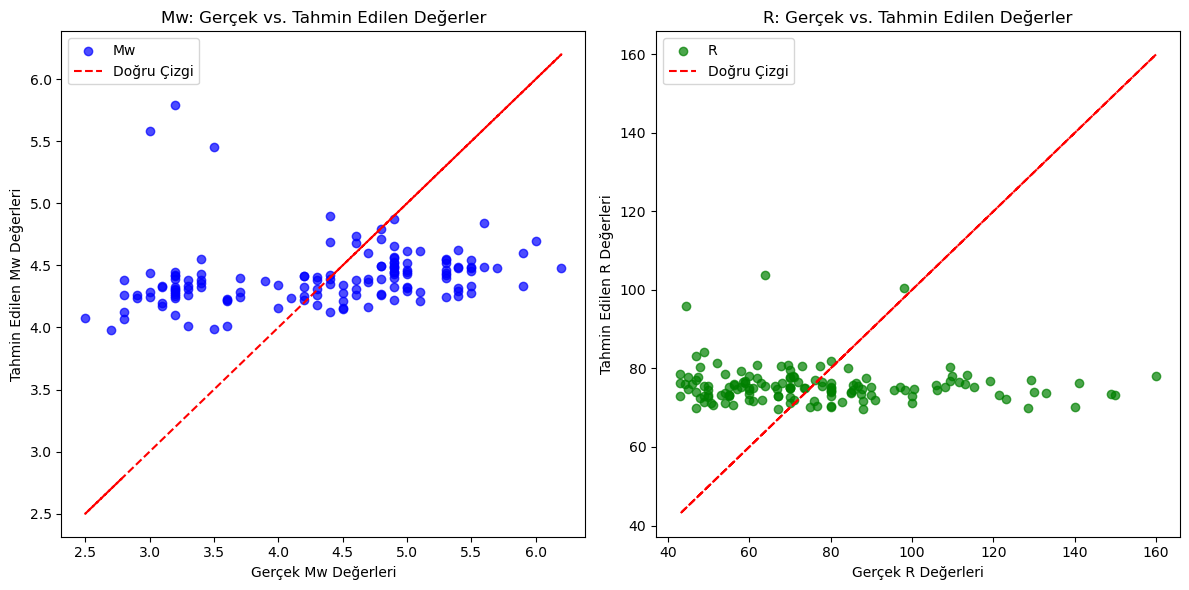

In [65]:
# Gerçek ve tahmin edilen değerleri içeren DataFrame'i kullanarak çizim yap

result_df_lstm = pd.DataFrame({'Actual_MW': y_test['Mw'], 'Predicted_MW': predictions_lstm[:, 0], 'Actual_R': y_test['R'], 'Predicted_R': predictions_lstm[:, 1]})

plt.figure(figsize=(12, 6))

# Mw için grafik
plt.subplot(1, 2, 1)
plt.scatter(result_df_lstm['Actual_MW'], result_df_lstm['Predicted_MW'], color='blue', label='Mw', alpha=0.7)
plt.plot(result_df_lstm['Actual_MW'], result_df_lstm['Actual_MW'], color='red', linestyle='--', label='Doğru Çizgi')
plt.xlabel('Gerçek Mw Değerleri')
plt.ylabel('Tahmin Edilen Mw Değerleri')
plt.title('Mw: Gerçek vs. Tahmin Edilen Değerler')
plt.legend()

# R için grafik
plt.subplot(1, 2, 2)
plt.scatter(result_df_lstm['Actual_R'], result_df_lstm['Predicted_R'], color='green', label='R', alpha=0.7)
plt.plot(result_df_lstm['Actual_R'], result_df_lstm['Actual_R'], color='red', linestyle='--', label='Doğru Çizgi')
plt.xlabel('Gerçek R Değerleri')
plt.ylabel('Tahmin Edilen R Değerleri')
plt.title('R: Gerçek vs. Tahmin Edilen Değerler')
plt.legend()

plt.tight_layout()
plt.show()

### Gated Recurrent Unit (GRU):



In [68]:
from keras.layers import GRU

In [69]:
# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y = cluster_2[['Mw', 'R']]

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri standartlaştır (önemli bir adım)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GRU modelini oluştur ve eğit
model_gru = Sequential()
model_gru.add(GRU(units=64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_gru.add(Dense(32, activation='relu'))
model_gru.add(Dense(2))  # Çıktı boyutu 2 (Mw ve R tahminleri)

model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Test verisi üzerinde tahmin yap
predictions_gru = model_gru.predict(X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1)))

# Hata ölçümlerini yazdır
mse_gru_mw = mean_squared_error(y_test['Mw'], predictions_gru[:, 0])
rmse_gru_mw = np.sqrt(mse_gru_mw)
r2_gru_mw = r2_score(y_test['Mw'], predictions_gru[:, 0])

mse_gru_r = mean_squared_error(y_test['R'], predictions_gru[:, 1])
rmse_gru_r = np.sqrt(mse_gru_r)
r2_gru_r = r2_score(y_test['R'], predictions_gru[:, 1])

print("GRU Results:")
print(f"MW Model MSE: {mse_gru_mw}")
print(f"MW Model RMSE: {rmse_gru_mw}")
print(f"MW Model R²: {r2_gru_mw}")

print(f"R Model MSE: {mse_gru_r}")
print(f"R Model RMSE: {rmse_gru_r}")
print(f"R Model R²: {r2_gru_r}")

# Tahmin sonuçlarını yazdır
result_df_gru = pd.DataFrame({'Actual_MW': y_test['Mw'], 'Predicted_MW': predictions_gru[:, 0], 'Actual_R': y_test['R'], 'Predicted_R': predictions_gru[:, 1]})
print(result_df_gru)

Epoch 1/50
15/15 [==============================] - 1s 15ms/step - loss: 3287.6631 - val_loss: 3564.0090
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 3251.3081 - val_loss: 3508.7991
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 3169.1531 - val_loss: 3364.3350
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 2930.5632 - val_loss: 2905.0969
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 2138.5210 - val_loss: 1609.1309
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 1228.7340 - val_loss: 1029.6031
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 740.3920 - val_loss: 760.2249
Epoch 8/50
15/15 [==============================] - 0s 4ms/step - loss: 536.6119 - val_loss: 609.3009
Epoch 9/50
15/15 [==============================] - 0s 4ms/step - loss: 450.3039 - val_loss: 586.0972
Epoch 10/50
15/15 [==============================] - 0s 4ms/step - lo

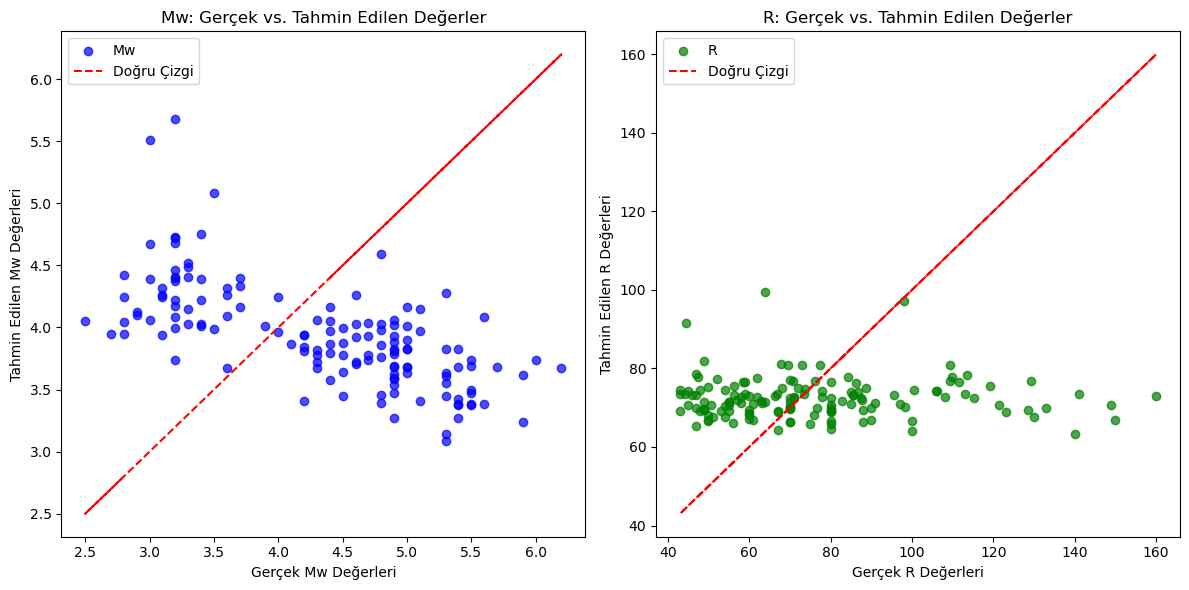

In [70]:
# Gerçek ve tahmin edilen değerleri içeren DataFrame'i kullanarak çizim yap
plt.figure(figsize=(12, 6))

# Mw için grafik
plt.subplot(1, 2, 1)
plt.scatter(result_df_gru['Actual_MW'], result_df_gru['Predicted_MW'], color='blue', label='Mw', alpha=0.7)
plt.plot(result_df_gru['Actual_MW'], result_df_gru['Actual_MW'], color='red', linestyle='--', label='Doğru Çizgi')
plt.xlabel('Gerçek Mw Değerleri')
plt.ylabel('Tahmin Edilen Mw Değerleri')
plt.title('Mw: Gerçek vs. Tahmin Edilen Değerler')
plt.legend()

# R için grafik
plt.subplot(1, 2, 2)
plt.scatter(result_df_gru['Actual_R'], result_df_gru['Predicted_R'], color='green', label='R', alpha=0.7)
plt.plot(result_df_gru['Actual_R'], result_df_gru['Actual_R'], color='red', linestyle='--', label='Doğru Çizgi')
plt.xlabel('Gerçek R Değerleri')
plt.ylabel('Tahmin Edilen R Değerleri')
plt.title('R: Gerçek vs. Tahmin Edilen Değerler')
plt.legend()

plt.tight_layout()
plt.show()


In [46]:
from keras.layers import Input, Dense
from keras.models import Model

# Girdi ve çıktı değişkenlerini belirle
X = cluster_2[['Enlem', 'Boylam', 'Aylar']]
y = cluster_2[['Mw', 'R']]

# Veriyi eğitim ve test setlerine ayır
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Verileri standartlaştır (önemli bir adım)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Autoencoder modelini oluştur ve eğit
input_layer = Input(shape=(X_train_scaled.shape[1],))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(X_train_scaled.shape[1], activation='linear')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Eğitilmiş modeli kullanarak veriyi kodla ve çöz
encoded_data = autoencoder.predict(X_test_scaled)

# Hata ölçümlerini yazdır
mse_autoencoder = mean_squared_error(X_test_scaled, encoded_data)
rmse_autoencoder = np.sqrt(mse_autoencoder)
r2_autoencoder = r2_score(X_test_scaled, encoded_data)

print("Autoencoder Results:")
print(f"MSE: {mse_autoencoder}")
print(f"RMSE: {rmse_autoencoder}")
print(f"R²: {r2_autoencoder}")

# Özgün ve çözülmüş veriyi göster
result_df_autoencoder = pd.DataFrame({'Original_Enlem': X_test_scaled[:, 0], 'Decoded_Enlem': encoded_data[:, 0], 
                                      'Original_Boylam': X_test_scaled[:, 1], 'Decoded_Boylam': encoded_data[:, 1],
                                      'Original_Aylar': X_test_scaled[:, 2], 'Decoded_Aylar': encoded_data[:, 2]})
print(result_df_autoencoder)


Epoch 1/50
15/15 [==============================] - 0s 7ms/step - loss: 0.7458 - val_loss: 0.7178
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5351 - val_loss: 0.5043
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3690 - val_loss: 0.3485
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.2499 - val_loss: 0.2310
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.1612 - val_loss: 0.1461
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0990 - val_loss: 0.0925
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0610 - val_loss: 0.0556
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0365 - val_loss: 0.0333
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.0207
Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.0150
Epoch 11/50
15/15 [